# Plot Mass spectometry

In [1]:
import regseq.viz

# Set the PBoC plotting style
from regseq.utils import pboc_style_mpl
pboc_style_mpl()

For a more detailed explanation of the purpose of this notebook, refer to the [documentation of the regseq experiment](https://github.com/RPGroup-PBoC/regseq/wiki/5.-Mass-Spectrometry).<br>
First we load in the mass spectometry data.

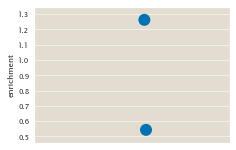

In [6]:
file = '../data/massspec/proteinGroups20June19.txt'
regseq.viz.mass_spec(file)

Remove any rows which don't actually have ratios (those proteins where we did not find enough peptides will have an NaN for enrichment)

In [3]:
enrichment2 = enrichment.dropna()
enrichment2.head()

NameError: name 'enrichment' is not defined

Sort the entries so that they go from highest enrichment to lowest.

In [ ]:
enrichment2 = enrichment2.sort_values(by=good_column,ascending=False)
enrichment2.head()

We are looking for proteins that are binding DNA. The function below loads a file containing all genes which are encoding DNA binding genes, and returns a list of booleans if genes from the mass spec data are in this list.

In [ ]:
def check_DNA(s):
    '''This function will return only those proteins which have DNA binding activity.'''
    with open('../data/massspec/DNAbinding_genenames.txt') as f:
        genenames = f.read()
        genenames = genenames.split(',\n')
    if s in genenames:
        return True
    else:
        return False

Now we can apply this function to the mass spectometry data, and find DNA binding proteins.

In [ ]:
goodrows = enrichment2['Protein names'].apply(check_DNA)
enrichment3 = enrichment2[goodrows]

In [ ]:
#plot results
fig,ax = plt.subplots()
ax.set_xlabel('')
ax.set_ylabel('enrichment')
sns.stripplot(data=list(enrichment3[good_column]),jitter=True,size=12)
plt.savefig(inname + '_output.eps', format='eps')


Finally, here are the versions of packages used in this notebook. To display the versions, we are using the Jupyter Lab extension `watermark`, which can be found [here](https://github.com/rasbt/watermark).

## Computing Environment

In [3]:
%load_ext watermark
%watermark -v -p jupyterlab,matplotlib,seaborn,pandas,numpy,regseq

CPython 3.6.9
IPython 7.13.0

jupyterlab not installed
matplotlib 3.1.3
seaborn 0.10.1
pandas 1.0.3
numpy 1.18.1
regseq 0.0.2
